In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import ensemble, metrics, tree

In [3]:
import import_ipynb
import pomocnicze_funkcje as pf

importing Jupyter notebook from pomocnicze_funkcje.ipynb


In [4]:
np.set_printoptions(precision=2,suppress=True,linewidth=80)

# Zadanie 6, Lista 5

In [5]:
bank=pd.read_csv("Bank/bank-additional-full.csv",sep=';')

In [6]:
bank

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...         1    999         0   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41186   cellular   nov         fri  ...         1    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41188 rows x 21 columns]

In [7]:
bankKlasa=bank["y"]

In [32]:
bankWagi=np.where(bank["y"]=="yes",8,1)

In [33]:
bankWagi

array([1, 1, 1, ..., 1, 8, 1])

In [34]:
np.sum(bankWagi[bank["y"]=="yes"])

37120

In [35]:
np.sum(bankWagi[bank["y"]=="no"])

36548

In [12]:
bankKlasa=pd.Categorical(bankKlasa).codes

In [13]:
bank

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...         1    999         0   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41186   cellular   nov         fri  ...         1    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41188 rows x 21 columns]

In [14]:
#Pominięcie czasu trwania, ze względu na brak tej 
#informacji przed rozpoczęciem rozmowy i duży wpływ na wyniki końcowe
bankPomiary=bank.drop(['y',"duration"],axis=1)

In [15]:
for i in ["job","marital","education","default","housing","loan","contact","month","day_of_week","poutcome"]:
    bankPomiary[i]=pd.Categorical(bankPomiary[i]).codes

In [16]:
bankPomiary=bankPomiary.__array__()

In [46]:
bank

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...         1    999         0   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41186   cellular   nov         fri  ...         1    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41188 rows x 21 columns]

# Testy

### Random forest

In [20]:
pf.crossValR(10, bankPomiary, bankKlasa,wagi=bankWagi)

array([[3546.99,  107.81],
       [ 332.65,  131.35]])

### Extreme random forest

In [21]:
pf.crossValE(10, bankPomiary, bankKlasa,wagi=bankWagi)

array([[3505.19,  149.61],
       [ 321.53,  142.47]])

###### -----------------------------

In [18]:
pf.crossValR(10, bankPomiary, bankKlasa,wagi=bankWagi, glebokosc=10, proby=1)

array([[3263.3,  391.5],
       [ 184.9,  279.1]])

In [19]:
pf.crossValE(10, bankPomiary, bankKlasa,wagi=bankWagi, glebokosc=10, proby=1)

array([[3184.7,  470.1],
       [ 174.7,  289.3]])

###### --------------------

In [36]:
pf.crossValR(10, bankPomiary, bankKlasa,wagi=bankWagi, glebokosc=35, proby=1)

array([[3549. ,  105.8],
       [ 330.6,  133.4]])

In [37]:
pf.crossValE(10, bankPomiary, bankKlasa,wagi=bankWagi, glebokosc=35, proby=1)

array([[3507.4,  147.4],
       [ 322.2,  141.8]])

###### ------------------------

In [47]:
pf.crossValR(10, bankPomiary, bankKlasa,wagi=bankWagi, glebokosc=25, proby=2)

array([[3542.4,  112.4],
       [ 328.1,  135.9]])

In [48]:
pf.crossValE(10, bankPomiary, bankKlasa,wagi=bankWagi, glebokosc=25, proby=2)

array([[3495.95,  158.85],
       [ 316.3 ,  147.7 ]])

###### ------------------

In [49]:
pf.crossValR(10, bankPomiary, bankKlasa,wagi=bankWagi, glebokosc=26, proby=2)

array([[3543.4 ,  111.4 ],
       [ 330.45,  133.55]])

In [50]:
pf.crossValE(10, bankPomiary, bankKlasa,wagi=bankWagi, glebokosc=26, proby=2)

array([[3499.5 ,  155.3 ],
       [ 320.05,  143.95]])

# Inne wagi

In [20]:
bankWagi=np.where(bank["y"]=="yes",12,1)

In [22]:
pf.crossValR(10, bankPomiary, bankKlasa,wagi=bankWagi, proby=2)

array([[3546.9,  107.9],
       [ 332.2,  131.8]])

In [23]:
pf.crossValE(10, bankPomiary, bankKlasa,wagi=bankWagi, proby=2)

array([[3505.05,  149.75],
       [ 319.15,  144.85]])

###### -----------------------

In [24]:
pf.crossValR(10, bankPomiary, bankKlasa,wagi=bankWagi, proby=2, liscie=3)

array([[3346.75,  308.05],
       [ 210.15,  253.85]])

In [26]:
pf.crossValE(10, bankPomiary, bankKlasa,wagi=bankWagi, proby=2, liscie=3)

array([[3160.35,  494.45],
       [ 176.2 ,  287.8 ]])

###### --------------

In [27]:
pf.crossValR(10, bankPomiary, bankKlasa,wagi=bankWagi, proby=2, glebokosc=20)

array([[3495.45,  159.35],
       [ 296.7 ,  167.3 ]])

In [28]:
pf.crossValE(10, bankPomiary, bankKlasa,wagi=bankWagi, proby=2, glebokosc=20)

array([[3361.4,  293.4],
       [ 270.1,  193.9]])

###### --------------------

In [29]:
pf.crossValR(10, bankPomiary, bankKlasa,wagi=bankWagi, proby=2, glebokosc=35)

array([[3545.25,  109.55],
       [ 331.8 ,  132.2 ]])

In [30]:
pf.crossValE(10, bankPomiary, bankKlasa,wagi=bankWagi, proby=2, glebokosc=35)

array([[3506.6,  148.2],
       [ 322.3,  141.7]])

# Rysunek

In [42]:
t=ensemble.RandomForestClassifier()
t.fit(bankPomiary, bankKlasa, sample_weight=bankWagi)

/home/kuba/Programy/anaconda3/envs/ED/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

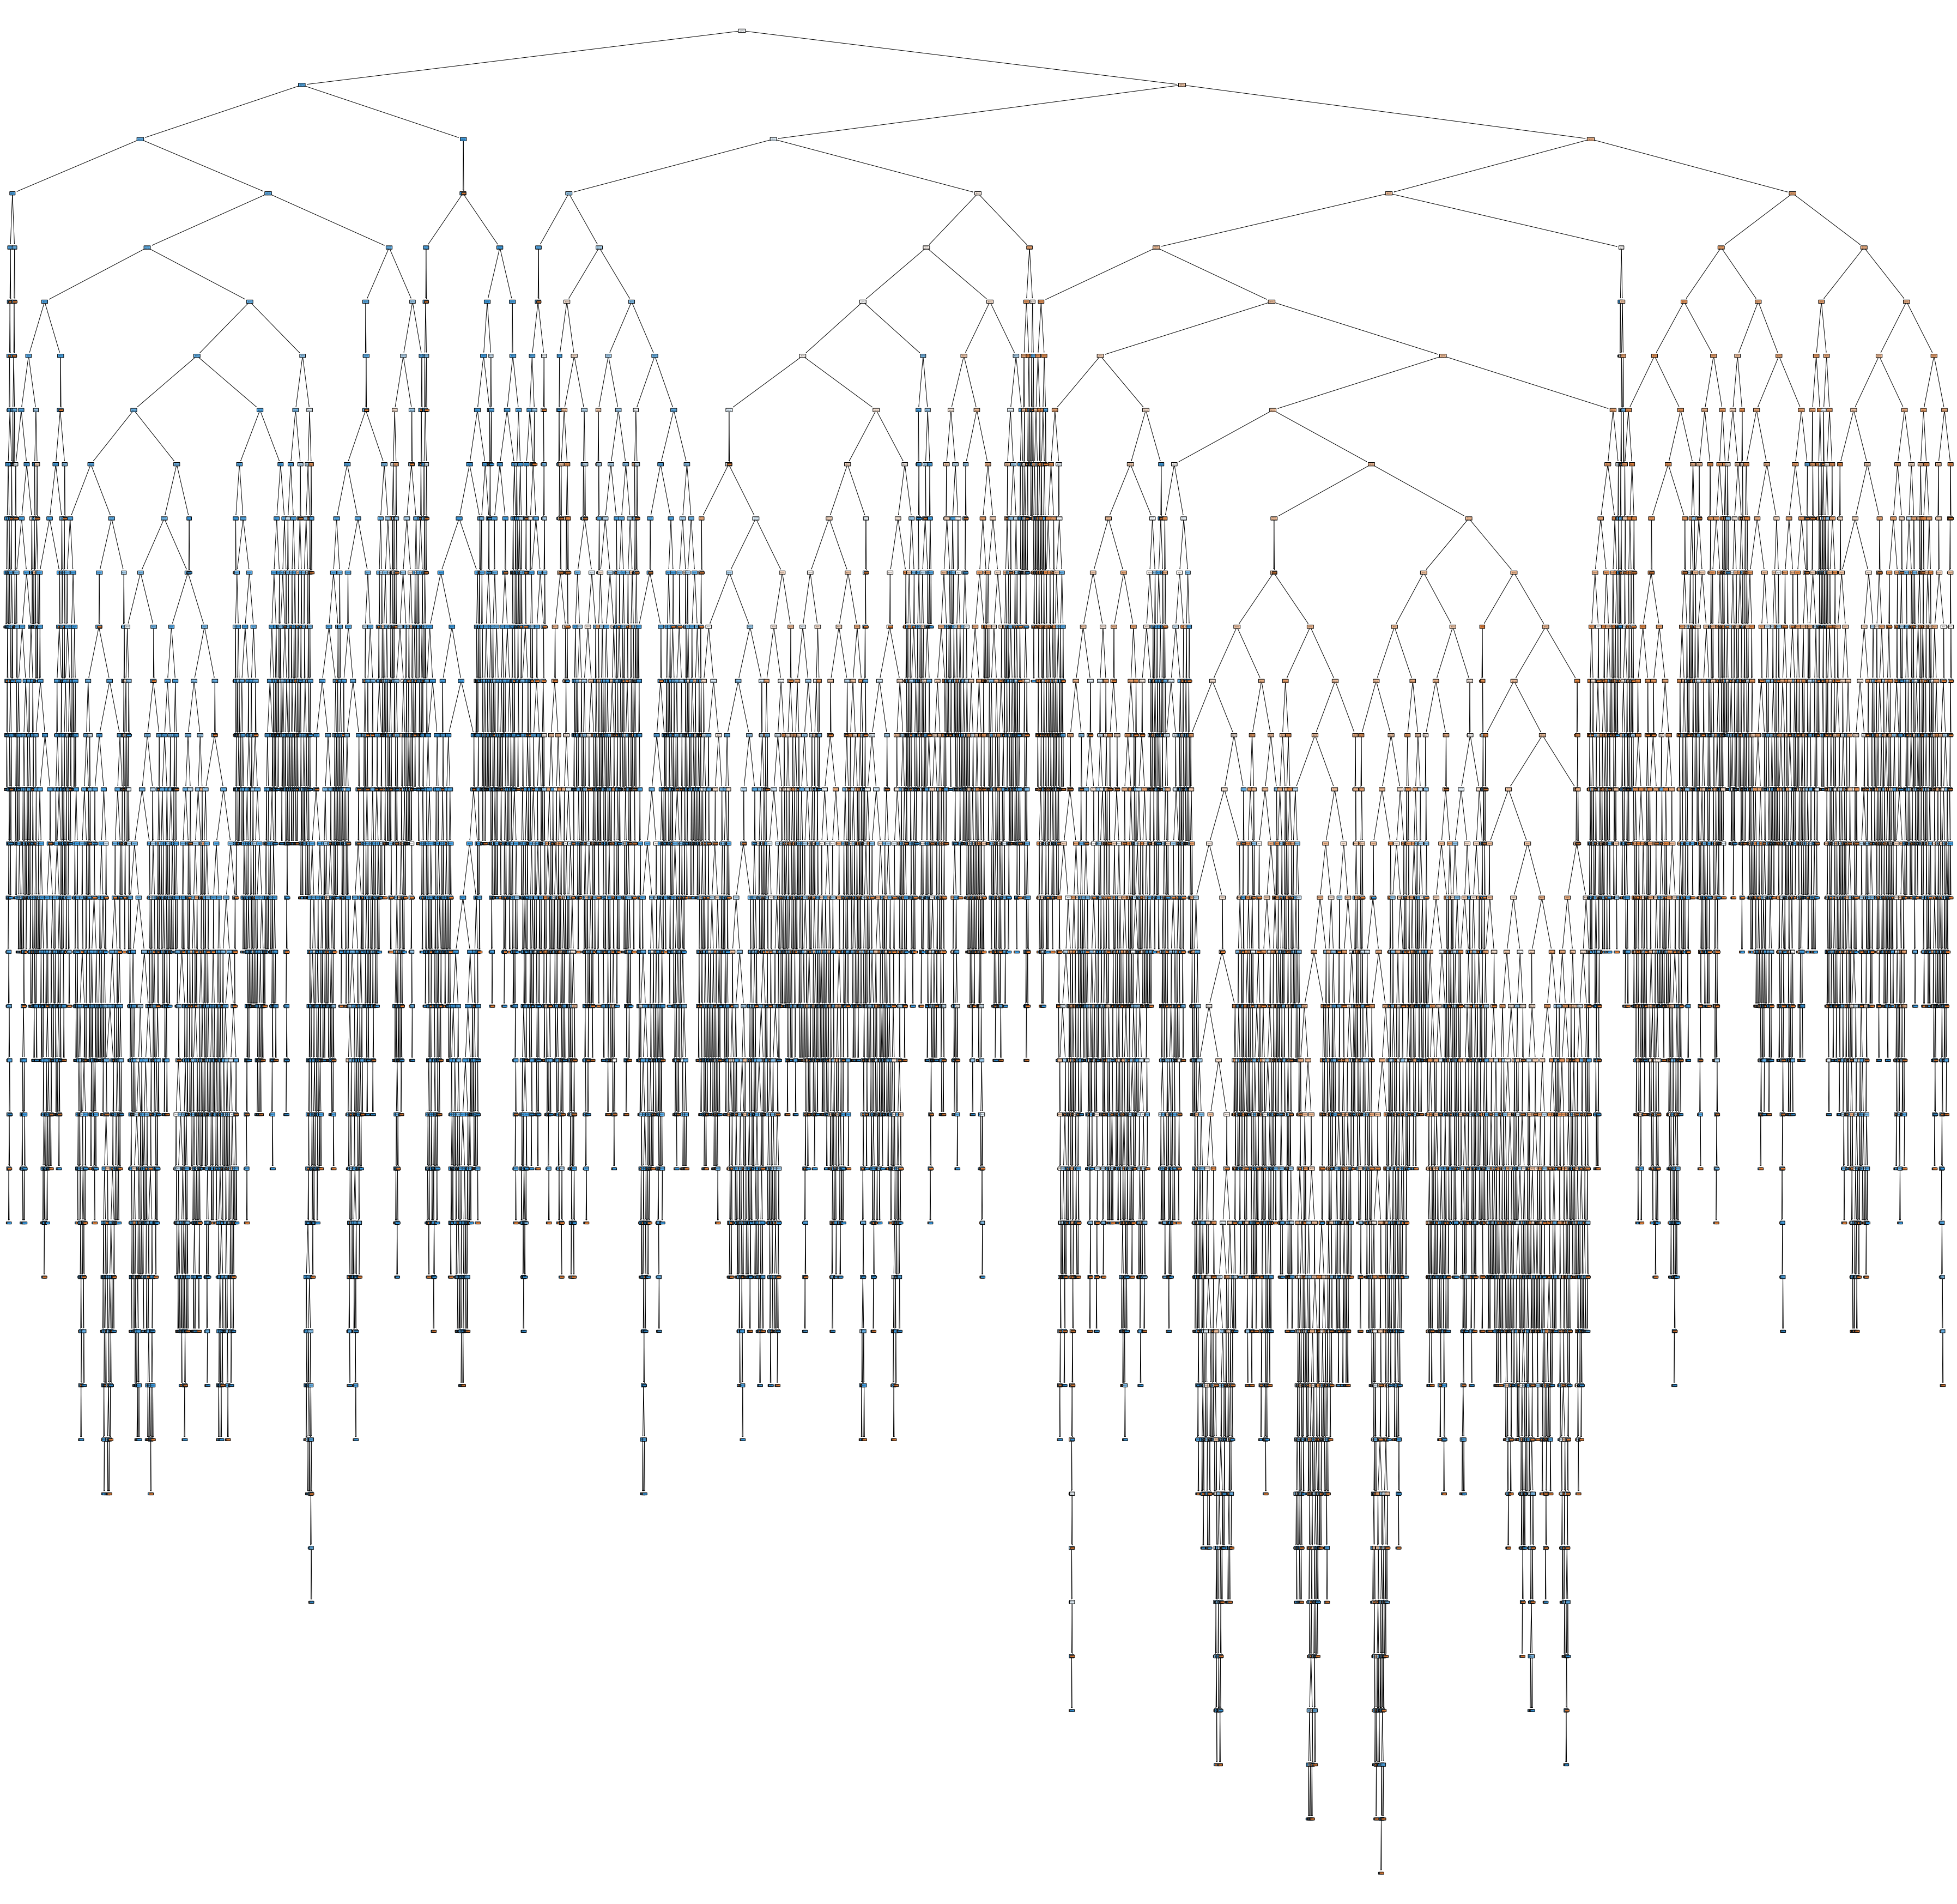

In [45]:
plt.gcf().set_size_inches(64,64)
tree.plot_tree(t.estimators_[0] , rounded=True, filled=True)
plt.savefig("Zad6-bank")